# Assignment 3: ICP + Non-linear least squares optimization

TEAM-ID: 12  
TEAM-NAME: panzer-blow  
YOUR-ID: 2018111024              
YOUR-NAME: Vikrant Dewangan

(Although you work in groups, both the students have to submit to Moodle, hence there's name field above)


## Instructions

* Please check Moodle for "TEAM-ID" and "TEAM-NAME" fields above. Some of your names have been edited because of redundancy/simplicity. Instructions for submitting the assignment through GitHub Classrooms/Moodle has been uploaded on Moodle. Any clarifications will be made there itself.
* Code must be written in Python in Jupyter Notebooks. You can use Assignment-1's environment for this assignment. More instructions for setup provided as you progress through this assignment.
* Both the team members must submit the zip file.
* You are not allowed to use any external libraries (other than ones being imported below).
* Answer the descriptive questions in your own words with context & clarity. Do not just copy-paste from some Wikipedia page. You will be evaluated accordingly.
* You could split the Jupyter Notebook cells where TODO is written, but please try to avoid splitting/changing the structure of other cells.

In [2]:
# Only allowed to use these libraries for this assignment. 
# Setup: Just activate Assignment-1's environment and install matplotlib `python -m pip install -U matplotlib`

import numpy as np
import math
import matplotlib.pyplot as plt
import time

# Question 1: Simple Non-Linear least squares for Gaussian function

First, go through the [solved example here](https://www.notion.so/saishubodh/From-linear-algebra-to-non-linear-weighted-least-squares-13cf17d318be4d45bb8577c4d3ea4a02#1de60a8465664d39a12af24353feef9e) from the [notes page](https://www.notion.so/saishubodh/Mobile-Robotics-2020-Students-Page-0b65a9c20edd4081978f4ffad917febb#a68cabac64754fa485144cc89b4b8c65). After understanding this, 

(1.1) Code it from scratch using `numpy` and try it out yourself for say different number of iterations with a certain tolerance for all 50 observations using Gradient Descent. Make the following plots using `matplotlib`:
   * Data and fit plot: Ground truth Gaussian, observations (points) & predicted Gaussian on the same plot.
   * Cost function ($\|r\|^2$) vs number of iterations   
   
Experiment with the hyperparameters and compile your observations in a table. Clearly mention your hyperparameters with justification.

(1.2) You've used Gradient Descent above. Now implement Gauss-Newton and LM algorithms. To contrast between the three, you must experiment with 
   * Different initial estimate: Can a particular algorithm handle if the initial estimate is too far from GT?
   * Different number of observations: Can a particular algorithm handle very less observations?
   * Add [noise](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) to your observations: Can a particular algorithm handle large noise?
   * What else can you think of? (For example, can an algorithm converge in less iterations compared to others?)
    
Make the plots (mentioned in 1.1) for all 3 algorithms. Report your observations in a table(s) (comparison between the three for different factors). You will be awarded depending on how comprehensive your experimentation is (which you have to explain below under "**Answers for Question 1**" section).

## Code for Question 1

### Data Initialization

In [3]:

# Only numpy & matplotlib is sufficient for this question.
##############################################################################
# TODO: Do tasks described in Question 1                                     #
##############################################################################
# Replace "pass" statement with your code (You can split this cell into
# multiple cells if you wish to)

def gaussian(x,a,m,s):
    return a*np.exp(-((x-m)**2)/(2*(s**2)))

def r_func(x,y,a,m,s):
    return gaussian(x,a,m,s)-y

def jr_func(x,a,m,s):
    gs=gaussian(x,1,m,s)
    xs=(a/s**2)*(x-m)
    return np.hstack([gs.reshape(-1,1),(xs*gs).reshape(-1,1),((s/a)*(xs**2)*gs).reshape(-1,1)])



### Algo

In [4]:
def gradient_descent(x_obs,y_obs,num_obs = 50,k=[10,13,19.12],lr = 0.01,num_iter = 200,tol=1e-15):
    a_o,m_o,s_o=k
    r=r_func(x_obs,y_obs,a_o,m_o,s_o)
    jr=jr_func(x_obs,a_o,m_o,s_o)
    r_norm=[]
    
    for i in range(0,num_iter):
        r=r_func(x_obs,y_obs,a_o,m_o,s_o)
        r_norm.append(sum(r**2))
        jr=jr_func(x_obs,a_o,m_o,s_o)
        jf=jr.T@r
        dk=-lr*jf
        if sum(dk**2)<tol:
            break
        k+=dk
        a_o,m_o,s_o=k

    a_o,m_o,s_o=k    
#     return np.log(r_norm),k
    return r_norm,k
    
def gauss_newton(x_obs,y_obs,num_obs = 50,k=[10,13,19.12],lr = 0.01,num_iter = 200,tol=1e-15):
    a_o,m_o,s_o=k
    r=r_func(x_obs,y_obs,a_o,m_o,s_o)
    jr=jr_func(x_obs,a_o,m_o,s_o)
    r_norm=[]
    
    for i in range(0,num_iter):
        r=r_func(x_obs,y_obs,a_o,m_o,s_o)
        r_norm.append(sum(r**2))
        jr=jr_func(x_obs,a_o,m_o,s_o)
        dk=-np.linalg.pinv(jr)@r
        if sum(dk**2)<tol:
            break
        k+=dk
        a_o,m_o,s_o=k

    a_o,m_o,s_o=k
#     return np.log(r_norm),k
    return r_norm,k


def lm_algo(x_obs,y_obs,num_obs = 50,k=[10,13,19.12],lr = 0.01,num_iter = 200,tol=1e-15):
    
    a_o,m_o,s_o=k
    r=r_func(x_obs,y_obs,a_o,m_o,s_o)
    jr=jr_func(x_obs,a_o,m_o,s_o)

    r_norm=[]
    
    for i in range(0,num_iter):
        r=r_func(x_obs,y_obs,a_o,m_o,s_o)
        r_norm.append(sum(r**2))
        if i:
            if sum(r**2)>err:
                lr*=10
            else:
                lr/=10
        err=sum(r**2)
        jr=jr_func(x_obs,a_o,m_o,s_o)
        jf=np.linalg.pinv((jr.T@jr)+(lr*np.eye(jr.shape[1])))@jr.T
        dk=-jf@r
        if sum(dk**2)<tol:
            break
        k+=dk
        a_o,m_o,s_o=k

    a_o,m_o,s_o=k
#     return np.log(r_norm),k
    return r_norm,k 

In [5]:
def plot_gd(num_obs = 50,k = [10,11,19.5], lr = 0.01,num_iter = 200,tol=1e-15):
    x_obs = np.linspace(-25,25, num_obs)
    a_gt,m_gt,s_gt=[10,0,20]
    y_obs = gaussian(x_obs,a_gt,m_gt,s_gt)        
    gd_r,gd_k=gradient_descent(x_obs,y_obs,num_obs)
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.plot(gd_r)
    plt.ylabel('Cost')
    plt.xlabel('Number of iterations')
    plt.title('Gradient Descent Cost function vs number of iterations')
    plt.subplot(122)
    plt.plot(x_obs,y_obs,label='Ground Truth')
    plt.plot(x_obs,gaussian(x_obs,gd_k[0],gd_k[1],gd_k[2]),label='Predicted')
    plt.title('Gradient Descent')
    plt.plot(x_obs,y_obs,'b.')

    # plt.ylabel('Cost Func.= ||r||**2')
    # plt.xlabel('Number of iterations')
    plt.title('Data and fit plot')
    plt.legend()
    plt.show()
 #############################################################################
#                             END OF YOUR CODE                               #
##############################################################################    

# 1.1

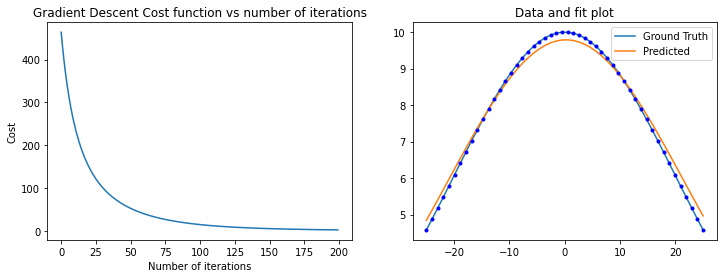

iter	 run	lr	tolr	error
100	100	0.001	1e-15	245.55549526278617
100	100	0.001	1e-10	245.55549526278617
100	100	0.001	1e-09	245.55549526278617
100	100	0.001	1e-05	245.55549526278617
100	55	0.001	0.001	319.4254783066727
100	100	0.01	1e-15	14.502153326520709
100	100	0.01	1e-10	14.502153326520709
100	100	0.01	1e-09	14.502153326520709
100	100	0.01	1e-05	14.502153326520709
100	100	0.01	0.001	14.502153326520709
100	100	0.05	1e-15	0.002706869233877587
100	100	0.05	1e-10	0.002706869233877587
100	100	0.05	1e-09	0.002706869233877587
100	99	0.05	1e-05	0.0030573863331594207
100	58	0.05	0.001	0.36881062648625795
100	100	0.1	1e-15	3226.6794144748737
100	9	0.1	1e-10	3226.6794144976266
100	9	0.1	1e-09	3226.6794144976266
100	9	0.1	1e-05	3226.6794144976266
100	9	0.1	0.001	3226.6794144976266
100	100	1	1e-15	11831.703757764582
100	100	1	1e-10	11831.703757764582
100	100	1	1e-09	11831.703757764582
100	100	1	1e-05	11831.703757764582
100	100	1	0.001	11831.703757764582
100	3	10	1e-15	3226.6793983461607
100	3	10	

In [23]:
## Define the plots inside a function above and call them in this cell one by one. When I run this cell, all plots
## asked in Q1 should be generated. 
##############################################################################

plot_gd(50,lr=2,num_iter = 300, tol = -1e40)

lr_var=[0.001,0.01,0.05,0.1,1,10]
tol_var=[1e-15,1e-10,1e-9,1e-5,1e-3]

print('iter' + '\t ' + 'run' + '\tlr'+'\t'+'tolr'+'\t'+'error')

x_obs = np.linspace(-25,25, 50)
a_gt,m_gt,s_gt=[10,0,20]
y_obs = gaussian(x_obs,a_gt,m_gt,s_gt)

for it in range(100,500,100):
    for lr in lr_var:
        for tol in tol_var:
            rr,kk=gradient_descent(x_obs,y_obs,num_iter = it,num_obs = 50,lr =lr,tol=tol)
            #print(it)
            print(str(it) + '\t' + str(len(rr))  + '\t' + str(lr) + '\t' + str(tol) + '\t' +  str(rr[-1]))

##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

# 1.2

## Diffrent initialiazation  

[10, 0, 20]	0.0	1
[10, 0, 20]	0.0	1
[10, 0, 20]	0.0	1
[10, 0, 20]


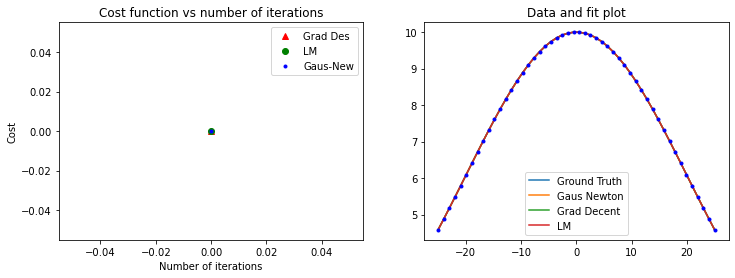

[10, 10, 10]	0.056953011238578294	200
[10, 10, 10]	3.1554436208840472e-30	7
[10, 10, 10]	1.270066057405829e-28	7
[10, 10, 10]


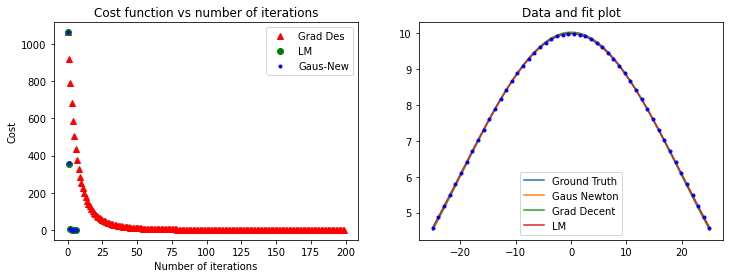

[1, 1, 1]	0.12793111256303027	200
[1, 1, 1]	4.596513279866661e-19	6
[1, 1, 1]	3.8409450519830807e-19	6
[1, 1, 1]


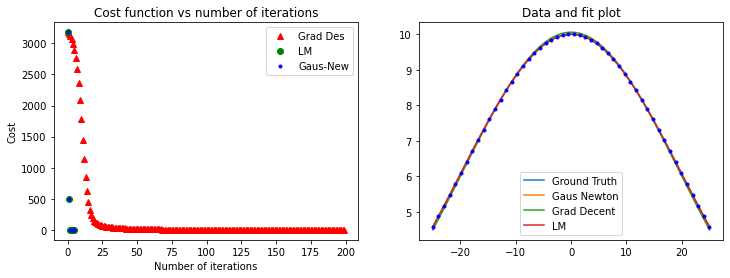

[40, 40, 40]	278.46060862932563	200
[40, 40, 40]	153.1246491876104	13
[40, 40, 40]	153.12464834068018	95
[40, 40, 40]


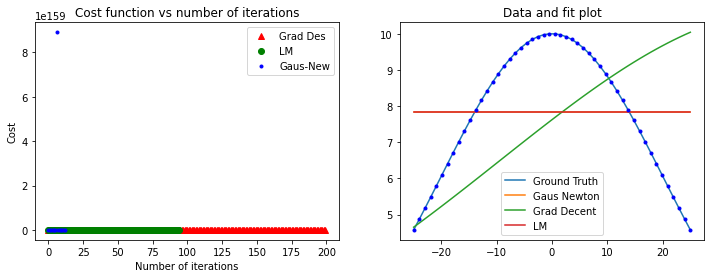

[5, 5, 5]	0.09775648237009432	200
[5, 5, 5]	9.751274955380033e-18	6
[5, 5, 5]	1.0049001054061366e-17	6
[5, 5, 5]


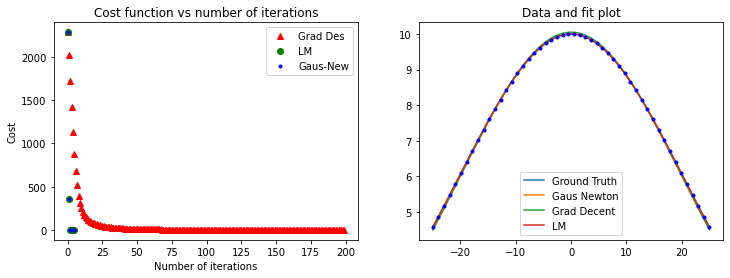

[-5, -5, -5]	0.1484679056569128	200
[-5, -5, -5]	1.2896480732255121e-16	7
[-5, -5, -5]	1.3464592839528877e-16	7
[-5, -5, -5]


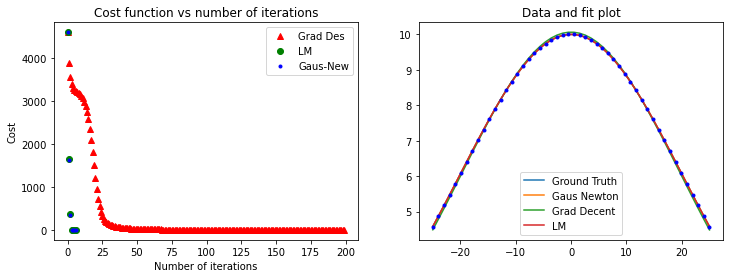

In [31]:
kk = [
    [10,0,20],
    [10,10,10],
    [1,1,1],
    [40,40,40],
    [5,5,5],
    [-5,-5,-5]
]

for i in kk:
    gd_r,gd_k=gradient_descent(x_obs,y_obs,k=i)
    gn_r,gn_k=gauss_newton(x_obs,y_obs,k=i)
    lm_r,lm_k=lm_algo(x_obs,y_obs,k=i)

    lr_var=[0.001,0.01,0.05,0.1,1,10]
    tol_var=[1e-15,1e-10,1e-9,1e-5,1e-3]
    a_gt,m_gt,s_gt=[i[0],i[1],i[2]]

    rr,kk=gradient_descent(x_obs,y_obs,k=i)
    rr2,kk2=gauss_newton(x_obs,y_obs,k=i)
    rr3,kk3=lm_algo(x_obs,y_obs,k=i)
    print(str(i)+'\t'+str(rr[-1]) + '\t' + str(len(rr)))
    print(str(i)+'\t'+str(rr2[-1])+ '\t' + str(len(rr2)))
    print(str(i)+'\t'+str(rr3[-1])+ '\t' + str(len(rr3)))
    print(i)
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.plot(gd_r,'r^',label='Grad Des')
    plt.plot(lm_r,'go',label='LM')
    plt.plot(gn_r,'b.',label='Gaus-New')

    plt.ylabel('Cost')
    plt.xlabel('Number of iterations')
    plt.title('Cost function vs number of iterations')
    plt.legend()


    plt.subplot(122)
    plt.plot(x_obs,y_obs,label='Ground Truth')
    plt.plot(x_obs,gaussian(x_obs,gn_k[0],gn_k[1],gn_k[2]),label='Gaus Newton')
    plt.plot(x_obs,gaussian(x_obs,gd_k[0],gd_k[1],gd_k[2]),label='Grad Decent')
    plt.plot(x_obs,gaussian(x_obs,lm_k[0],lm_k[1],lm_k[2]),label='LM')
    plt.title('Gauss Newton')
    plt.plot(x_obs,y_obs,'b.')

    # plt.ylabel('Cost Func.= ||r||**2')
    # plt.xlabel('Number of iterations')
    plt.title('Data and fit plot')
    plt.legend()
    
    plt.show()

    

## Different Number of Observaion

5	16.13106917998357	200
5	0.0	7
5	2.619018205333759e-28	7
5


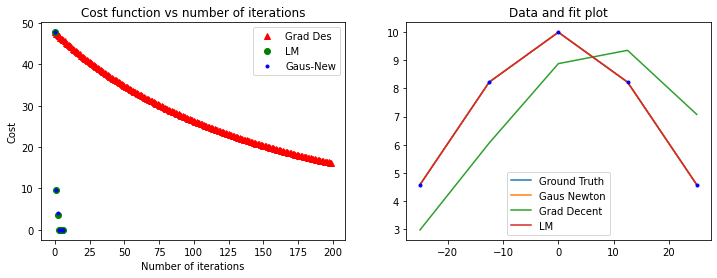

10	14.3919080514498	200
10	6.153115060723892e-29	7
10	4.617991739163803e-27	7
10


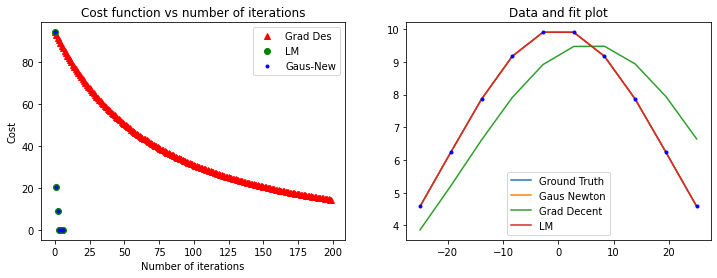

50	1.8193402209900782	200
50	2.5337423414793678e-26	7
50	5.405117150393329e-26	7
50


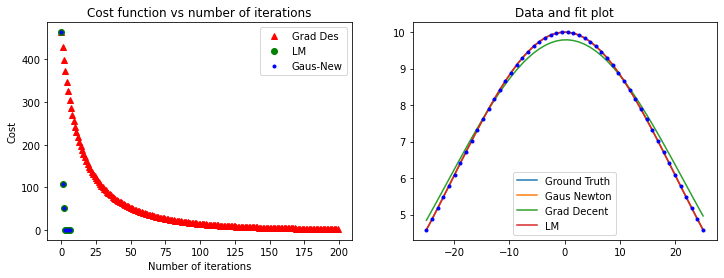

100	0.06381933318223207	200
100	8.801557777822395e-26	7
100	1.2386220617237195e-25	7
100


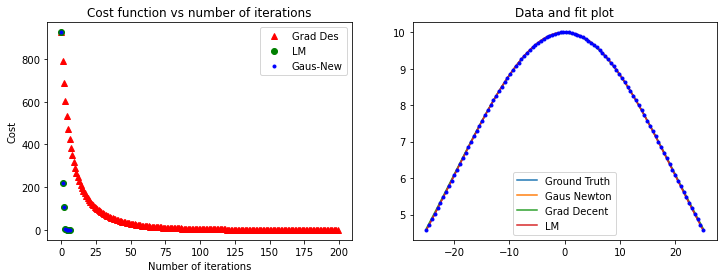

400	26128.240681434043	14
400	5.238312511984346e-25	7
400	5.603673440237457e-25	7
400


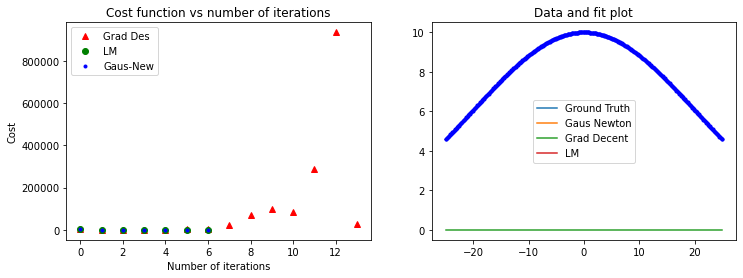

1000	3526.0895833176364	200
1000	1.42952876736992e-24	7
1000	1.5211076298570273e-24	7
1000


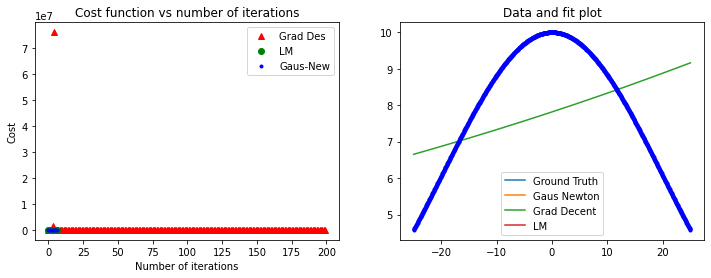

In [26]:
num_obser=[5,10,50,100,400,1000]

for nn in num_obser:
    x_obs = np.linspace(-25,25, nn)
    a_gt,m_gt,s_gt=[10,0,20]
    y_obs = gaussian(x_obs,a_gt,m_gt,s_gt)
    
    gd_r,gd_k=gradient_descent(x_obs,y_obs,num_obs = nn)
    gn_r,gn_k=gauss_newton(x_obs,y_obs,num_obs = nn)
    lm_r,lm_k=lm_algo(x_obs,y_obs,num_obs = nn)

    rr,kk=gradient_descent(x_obs,y_obs,num_obs = nn)
    rr2,kk2=gauss_newton(x_obs,y_obs,num_obs = nn)
    rr3,kk3=lm_algo(x_obs,y_obs,num_obs = nn)
    print(str(nn)+'\t'+str(rr[-1])+ '\t' + str(len(rr)))
    print(str(nn)+'\t'+str(rr2[-1])+ '\t' + str(len(rr2)))
    print(str(nn)+'\t'+str(rr3[-1])+ '\t' + str(len(rr3)))
    print(nn)
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.plot(gd_r,'r^',label='Grad Des')
    plt.plot(lm_r,'go',label='LM')
    plt.plot(gn_r,'b.',label='Gaus-New')

    plt.ylabel('Cost')
    plt.xlabel('Number of iterations')
    plt.title('Cost function vs number of iterations')
    plt.legend()


    plt.subplot(122)
    plt.plot(x_obs,y_obs,label='Ground Truth')
    plt.plot(x_obs,gaussian(x_obs,gn_k[0],gn_k[1],gn_k[2]),label='Gaus Newton')
    plt.plot(x_obs,gaussian(x_obs,gd_k[0],gd_k[1],gd_k[2]),label='Grad Decent')
    plt.plot(x_obs,gaussian(x_obs,lm_k[0],lm_k[1],lm_k[2]),label='LM')
    plt.title('Ground Truth points')
    plt.plot(x_obs,y_obs,'b.')

    # plt.ylabel('Cost Func.= ||r||**2')
    # plt.xlabel('Number of iterations')
    plt.title('Data and fit plot')
    plt.legend()
    
    plt.show()


## Noise

0.01	2.3085333989680743	200
0.01	0.48876245795168693	8
0.01	0.48876245795168644	8
0.01


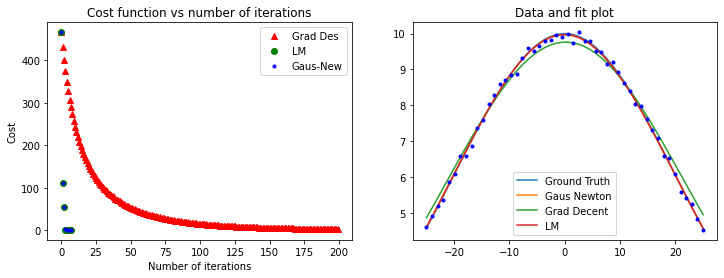

0.02	2.818812416545963	200
0.02	1.0048545412549297	7
0.02	1.0048545412549301	7
0.02


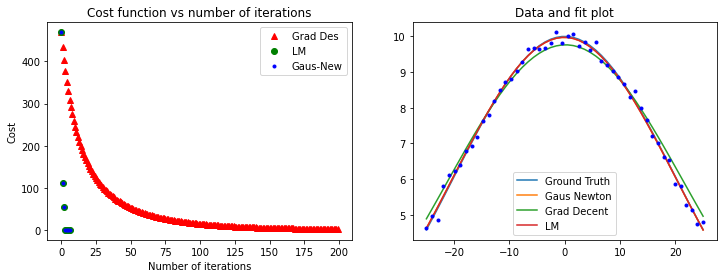

0.1	55.99505189089513	200
0.1	54.363970995418086	9
0.1	54.363970995418114	9
0.1


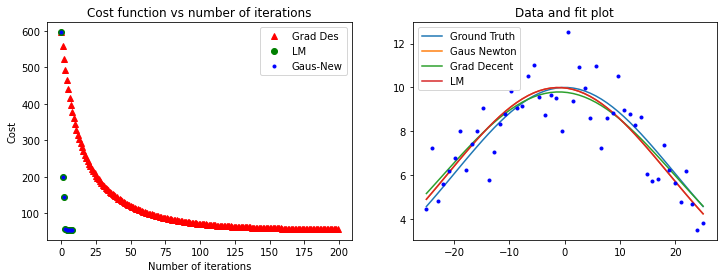

1	3405.568273320406	200
1	3634.3954382062316	11
1	6542.377626517934	13
1


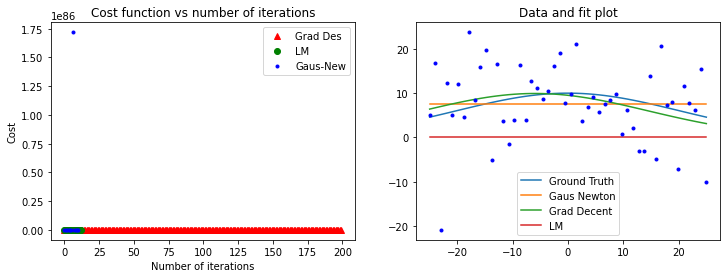

In [28]:
noise_factor = [1/100,1/50,1/10,1]

for nf in noise_factor:
    x_obs = np.linspace(-25,25, 50)
    a_gt,m_gt,s_gt=[10,0,20]
    y_org = gaussian(x_obs,a_gt,m_gt,s_gt)
    y_obs = y_org+np.random.normal(0,a_gt*nf,50)
    gd_r,gd_k=gradient_descent(x_obs,y_obs,num_obs = nn)
    gn_r,gn_k=gauss_newton(x_obs,y_obs,num_obs = nn)
    lm_r,lm_k=lm_algo(x_obs,y_obs,num_obs = nn)

    rr,kk=gradient_descent(x_obs,y_obs,num_obs = nn)
    rr2,kk2=gauss_newton(x_obs,y_obs,num_obs = nn)
    rr3,kk3=lm_algo(x_obs,y_obs,num_obs = nn)
    print(str(nf)+'\t'+str(rr[-1])+ '\t' + str(len(rr)))
    print(str(nf)+'\t'+str(rr2[-1])+ '\t' + str(len(rr2)))
    print(str(nf)+'\t'+str(rr3[-1])+ '\t' + str(len(rr3)))
    
    print(nf)
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.plot(gd_r,'r^',label='Grad Des')
    plt.plot(lm_r,'go',label='LM')
    plt.plot(gn_r,'b.',label='Gaus-New')

    plt.ylabel('Cost')
    plt.xlabel('Number of iterations')
    plt.title('Cost function vs number of iterations')
    plt.legend()


    plt.subplot(122)
    plt.plot(x_obs,y_org,label='Ground Truth')
    plt.plot(x_obs,gaussian(x_obs,gn_k[0],gn_k[1],gn_k[2]),label='Gaus Newton')
    plt.plot(x_obs,gaussian(x_obs,gd_k[0],gd_k[1],gd_k[2]),label='Grad Decent')
    plt.plot(x_obs,gaussian(x_obs,lm_k[0],lm_k[1],lm_k[2]),label='LM')
    plt.title('Gauss Newton')
    plt.plot(x_obs,y_obs,'b.')

    # plt.ylabel('Cost Func.= ||r||**2')
    # plt.xlabel('Number of iterations')
    plt.title('Data and fit plot')
    plt.legend()
    
    plt.show()


## Repeating the process of 1.1 for these 2 algorithms

In [32]:
## Code for repeating the process.
lr_var=[0.001,0.05,10]
tol_var=[1e-15,1e-3]
print("GAUSS NEWTON")
print('iter' + '\t ' + 'run' + '\tlr'+'\t'+'tolr'+'\t'+'error')

x_obs = np.linspace(-25,25, 50)
a_gt,m_gt,s_gt=[10,0,20]
y_obs = gaussian(x_obs,a_gt,m_gt,s_gt)

for it in range(100,500,100):
    for lr in lr_var:
        for tol in tol_var:
            rr,kk=gauss_newton(x_obs,y_obs,num_iter = it,num_obs = 50,lr =lr,tol=tol)
            #print(it)
            print(str(it) + '\t' + str(len(rr))  + '\t' + str(lr) + '\t' + str(tol) + '\t' +  str(rr[-1]))


print()
print()
print("LM ALGO")
print('iter' + '\t ' + 'run' + '\tlr'+'\t'+'tolr'+'\t'+'error')

for it in range(100,500,100):
    for lr in lr_var:
        for tol in tol_var:
            rr,kk=lm_algo(x_obs,y_obs,num_iter = it,num_obs = 50,lr =lr,tol=tol)
            #print(it)
            print(str(it) + '\t' + str(len(rr))  + '\t' + str(lr) + '\t' + str(tol) + '\t' +  str(rr[-1]))

        
            

GAUSS NEWTON
iter	 run	lr	tolr	error
100	7	0.001	1e-15	2.5337423414793678e-26
100	5	0.001	0.001	6.22969939363171e-05
100	7	0.05	1e-15	2.5337423414793678e-26
100	5	0.05	0.001	6.22969939363171e-05
100	7	10	1e-15	2.5337423414793678e-26
100	5	10	0.001	6.22969939363171e-05
200	7	0.001	1e-15	2.5337423414793678e-26
200	5	0.001	0.001	6.22969939363171e-05
200	7	0.05	1e-15	2.5337423414793678e-26
200	5	0.05	0.001	6.22969939363171e-05
200	7	10	1e-15	2.5337423414793678e-26
200	5	10	0.001	6.22969939363171e-05
300	7	0.001	1e-15	2.5337423414793678e-26
300	5	0.001	0.001	6.22969939363171e-05
300	7	0.05	1e-15	2.5337423414793678e-26
300	5	0.05	0.001	6.22969939363171e-05
300	7	10	1e-15	2.5337423414793678e-26
300	5	10	0.001	6.22969939363171e-05
400	7	0.001	1e-15	2.5337423414793678e-26
400	5	0.001	0.001	6.22969939363171e-05
400	7	0.05	1e-15	2.5337423414793678e-26
400	5	0.05	0.001	6.22969939363171e-05
400	7	10	1e-15	2.5337423414793678e-26
400	5	10	0.001	6.22969939363171e-05


LM ALGO
iter	 run	lr	tolr	error
1

## Answers for Question 1
### Answer for 1.1
Assuming the initial value provided, we vary the parameters learrning rate **(lr)** ,tolerance **(tolr)**  and number of iterations **(iter)** here. We have highlighted the cases when the algorithm has converged in the below table. Please note that by error, we denote the final cost.
- We notice that we have prematurely converging algorithm with high cost in 2 cases - either when lr is too **low** (say 0.001) and tolr is **high** (say 1e-3) in which case our algorithm giving high error , or lr is too high (say 10, 0.1) and tolr is not too low (say 1e-3, 1e-10), in which case it just converges at 3 and 9 iterations respectively. We also notice that in general, increasing the number of iterations decreases the error keeping lr constant.
- We now discuss the case when lr is just optimal that is 0.05, in this case, the algorithm converges at high iterations (286) for a very low tolr, giving us an extremely low error (1e-13) signifying that the algorithm ran in many iterations and converged at right value. Now as we lower our tolr, the algorithm converges at even lesser iterations (192, 99 and 58), giving us a higher error. This signifies that increasing tolerance decreases our accuracy and thus the error increases.


| lr          | tolr            | error  | iter  | iterations to converge |
| ------------- |:-------------:| -------:| -------: | -------: | 
| 0.001      | 1e-15      | 245.55549526278617 | 100 | 100 |
| 0.001      | 1e-15      | 151.40678975436737 | 200 | 200 |
| 0.001      | 1e-15      | 101.8405006259537 | 300 | 300 |
| 0.001      | 1e-15      | 72.13401725216825 | 400 | 400 |
| 0.001      | 1e-5      | 245.55549526278617 | 100 | 100 |
| 0.001      | 1e-5      | 151.40678975436737 | 200 | 200 |
| 0.001      | 1e-5      | 101.8405006259537 | 300 | 300 |
| 0.001      | 1e-5      | 72.13401725216825 | 400 | 400 |
| **0.001**      | 1e-3      | 319.4254783066727 | 100 | 55 |
| 0.05      | 1e-15      | 0.002706869233877587 | 100 | 100 |
| 0.05      | 1e-15      | 1.2285377280478665e-08 | 200 | 200 |
| **0.05**      | 1e-15      | 3.058462459719682e-13 | 300 | 286 |
| 0.05      | 1e-10      | 0.002706869233877587 | 100 | 100 |
| **0.05**      | 1e-10      | 3.2934037005422795e-08 | 200 | 192 |
| **0.05**      | 1e-5      | 0.0030573863331594207 | 100 | 99 |
| **0.05**      | 1e-3      | 0.36881062648625795 | 100 | 58 |
| 0.01      | 1e-15      | 14.502153326520709 | 100 | 100 |
| 0.01      | 1e-15      | 1.8193402209900782 | 200 | 200 |
| 0.01      | 1e-15      | 0.23431515483202311 | 300 | 300 |
| 0.01      | 1e-15      | 0.024503815176117487 | 400 | 400 |
| 0.01      | 1e-5      | 14.502153326520709 | 100 | 100 |
| 0.01      | 1e-5      | 1.8193402209900782 | 200 | 200 |
| 0.01      | 1e-5      | 0.23431515483202311 | 300 | 300 |
| **0.01**      | 1e-5      | 0.08845892018526398 | 400 | 344 |
| 0.01      | 1e-3      | 14.502153326520709 | 100 | 100 |
| **0.01**      | 1e-3      | 8.997259811381204 | 200 | 121 |
| 0.1      | 1e-15      |  3226.6794144748737 | 100 | 100 |
| **0.1**      | 1e-10      | 3226.6794144976266 | 100 | 9 |
| 1      | 1e-15      | 11831.703757764582 | 100 | 100 |
| 1      | 1e-15      | 1169.8420729385916 | 400 | 400 |
| 1      | 1e-3      | 11831.703757764582 | 100 | 100 |
| 1      | 1e-3      | 1169.8420729385916| 400 | 400 |
| **10**      | 1e-15      | 3226.6793983461607 | 100 | 3 |
| **10**     | 1e-3      | 3226.6793983461607 | 400 | 3 |


### Answer for 1.2
* First we discuss about varying initial guess. We report that in the case of the final cost in Gradient Descent and Gauss Newton, the error becomes too high when there are too offset guesses and that the error is much higher than LM Algorithm in the case.   We also note that LM algorithm produces one of the lowest errors in the production while giving an accurate guess and that gradient descent gives the guess at a higher cost.

| Initial Estimate          | Final Error | Algorithm | 
| ------------- |:-------------:| :-------------:|
| [10,0,20]      | 0.0      | Gradient Descent |
| [10,10,10]      |  0.056953011238578294      | Gradient Descent |
| [1,1,1]      |  0.12793111256303027      | Gradient Descent |
| [40,40,40]      | 278.46060862932563      | Gradient Descent |
| [5,5,5]      |  0.09775648237009432      | Gradient Descent |
| [-5,-5,-5]      |  0.1484679056569128      | Gradient Descent |
| [10,0,20]      | 0.0      | Gauss Newton |
| [10,10,10]      |  3.1554436208840472e-30      | Gauss Newton |
| [1,1,1]      | 4.596513279866661e-19      | Gauss Newton |
| [40,40,40]      | 153.1246491876104      | Gauss Newton |
| [5,5,5]      | 9.751274955380033e-18      | Gauss Newton |
| [-5,-5,-5]      | 1.2896480732255121e-16      | Gauss Newton |
| [10,0,20]      | 0.0      | LM Algorithm |
| [10,10,10]      |  1.270066057405829e-28      | LM Algorithm |
| [1,1,1]      |  3.8409450519830807e-19      | LM Algorithm |
| [40,40,40]      | 153.12464834068018      | LM Algorithm |
| [5,5,5]      |  1.0049001054061366e-17      | LM Algorithm |
| [-5,-5,-5]      |  1.3464592839528877e-16      | LM Algorithm |


* Now let us look at the case when we vary the number of observations. We report that increasing in the number of observations makes the error higher in Gauss Newton but lower in Gradient Descent. We also see that amongst the 3, LM algorithm has the least amount of error.

| Number of Observations          | Final Error | Algorithm | 
| ------------- |:-------------:| :-------------:|
| 5      | 16.13106917998357      | Gradient Descent |
| 10      |  14.3919080514498      | Gradient Descent |
| 50      |  1.8193402209900782      | Gradient Descent |
| 100      | 0.06381933318223207      | Gradient Descent |
| 400      |  26128.240681434043      | Gradient Descent |
| 1000      |   3526.0895833176364     | Gradient Descent |
| 5      | 0.0      | Gauss Newton |
| 10      |  14.3919080514498      | Gauss Newton |
| 50      | 2.5337423414793678e-26      | Gauss Newton |
| 100      | 8.801557777822395e-26      | Gauss Newton |
| 400      |  5.238312511984346e-25      | Gauss Newton |
| 1000      | 1.42952876736992e-24     | Gauss Newton |
| 5      | 2.619018205333759e-28     | LM Algorithm |
| 10      |  4.617991739163803e-27      | LM Algorithm |
| 50      |   5.405117150393329e-26      | LM Algorithm |
| 100      |  1.2386220617237195e-25      | LM Algorithm |
| 400      |  5.603673440237457e-25      | LM Algorithm |
| 1000      |  1.5211076298570273e-24      | LM Algorithm |

* We now add noise to our results and see the performance of each algorithm on various levels of noise. We notice that the final error in case of gradient descent is high and it doesnt converge with increase in noice. However, we see that LM algorithm converges and so does Gauss Newton. We see that LM algorithm has slightly more error in case of noise  = 1, but in general Gauss Newton and LM Algorithm performance is almost same. 

| Noise          | Final Error | Algorithm | Iterations |
| ------------- |:-------------:| :-------------:| :-------------:
| 0.01      | 2.3085333989680743      | Gradient Descent | 200 |
| 0.02      |  2.818812416545963      | Gradient Descent | 200 |
| 0.1      |   55.99505189089513      | Gradient Descent | 200 |
| 1      | 3405.568273320406      | Gradient Descent | 200 |
| 0.01      |  0.48876245795168693      | Gauss Newton | 8 | 
| 0.02      |  1.0048545412549297      | Gauss Newton | 7 |
| 0.1      | 54.363970995418086      | Gauss Newton | 9 |
| 1      |  3634.395438206231      | Gauss Newton | 11 |
| 0.01      | 0.48876245795168693     | LM Algorithm | 8 |
| 0.02      |  1.0048545412549301      | LM Algorithm | 7 |
| 0.1      |   54.363970995418114      | LM Algorithm | 9 |
| 1      |  6542.377626517934      | LM Algorithm | 13 |

* We now repeat the process of 1.1 for the 2 algorithms for comparison. Here we note that while the gradient descent converged at lr = 0.05, both of the algorithms seem to converge at 0.001. And we can see that increasing the value of tolr increases the error drastically for both of them, however the number of iterations taken to converge we see is extremely small  (5-7) compared to the gradient descent case. We conclude that they converge at a faster rate and at a lower lr. We also see that LM algorithm converges slightly early (from 7 to 6) if we increase tolr to 1e-3 from 1e-15. 

                                         Gauss-Newton

| lr          | tolr            | error  | iter  | iterations to converge |
| ------------- |:-------------:| -------:| -------: | -------: | 
| **0.001**      | 1e-15      | 2.5337423414793678e-26 | 100 | 7 |
| **0.001**      | 1e-3      | 6.22969939363171e-05 | 100 | 5 |
| **0.05**      | 1e-15      | 2.5337423414793678e-26 | 100 | 7 |
| **0.05**      | 1e-3      | 6.22969939363171e-05 | 100 | 5 |
 
 
                                        LM Algorithm
| lr          | tolr            | error  | iter  | iterations to converge |
| ------------- |:-------------:| -------:| -------: | -------: | 
| **0.001**      | 1e-15      | 2.675816190509672e-26 | 100 | 7 |
| **0.001**      | 1e-3      | 6.249556652187802e-05 | 100 | 5 |
| **10**      | 1e-15      | 7.748623820942881e-17 | 100 | 7 |
| **10**     | 1e-3      | 1.1849277224018271e-07 | 100 | 6 |



# Question 2: ICP Coding
Implement basic ICP algorithm with (given) known correspondences. 

Let X be your point cloud observed from the initial position. Your robot moved and observed P1 as your current point cloud. Same with P2 under a different transformation. Now you wish to apply ICP to recover transformation between (X & P1) and (X & P2). Use *root mean squared error (rmse)* as the error metric.

In [ ]:
# HELPER FUNCTIONS: DON'T EDIT THIS BLOCK - If you want to test on more cases, you can add code to this block but
# DON'T delete existing code.


# Visualizing ICP registration
def plot_icp(X, P, P0, i, rmse):
  plt.cla()
  plt.scatter(X[0,:], X[1,:], c='k', marker='o', s=50, lw=0)
  plt.scatter(P[0,:], P[1,:], c='r', marker='o', s=50, lw=0)
  plt.scatter(P0[0,:], P0[1,:], c='b', marker='o', s=50, lw=0)
  plt.legend(('X', 'P', 'P0'), loc='lower left')
  plt.plot(np.vstack((X[0,:], P[0,:])), np.vstack((X[1,:], P[1,:])) ,c='k')
  plt.title("Iteration: " + str(i) + "  RMSE: " + str(rmse))
  plt.axis([-10, 15, -10, 15])
  plt.gca().set_aspect('equal', adjustable='box')
  plt.draw()
  plt.pause(2)
  return

# Generating data for our simple ICP
def generate_data():
  
  # create reference data  
  X = np.array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 9, 9, 9, 9, 9],
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,-1,-2,-3,-4,-5]])
  
  # add noise
  P = X + 0.05 * np.random.normal(0, 1, X.shape)
  
  # translate
  P[0,:] = P[0,:] + 1
  P[1,:] = P[1,:] + 1
  
  # rotate
  theta1 = ( 10.0 / 360) * 2 * np.pi
  theta2 = (110.0 / 360) * 2 * np.pi
  rot1 = np.array([[math.cos(theta1), -math.sin(theta1)],
                   [math.sin(theta1),  math.cos(theta1)]])
  rot2 = np.array([[math.cos(theta2), -math.sin(theta2)],
                   [math.sin(theta2),  math.cos(theta2)]])
  
  # sets with known correspondences
  P1 = np.dot(rot1, P)
  P2 = np.dot(rot2, P)
  
  return X, P1, P2

In [ ]:
# TODO: Do tasks described in Q2                                             #
##############################################################################
# Replace "pass" statement with your code
from scipy.optimize import minimize


# TODO1: Get data X, P1, P2 from helper function generate_data(). 
X,P1,P2=generate_data()


def get_rmse(A,B):
    return np.sqrt(np.sum((A-B)**2)/B.shape[1])

# TODO2: Apply ICP between X and P_i. (in our case,(X & P1) and (X & P2))
def ICP(X, P):
    num_iter = 5 #Experiment & check if your theoretical understanding is correct.
    P0 = P #Initialization
    for i in range(num_iter):
        # implementing ICP:

        # TODO2.1: what's current error?
        rmse=get_rmse(X,P)
        # TODO2.2: call visualization helper function plot_icp.
        plot_icp(X,P,P0,i,rmse)
        # TODO2.3: Implement ICP to get R, t
        mu_x=sum(X.T)/X.shape[1]
        mu_p=sum(P.T)/P.shape[1]
        new_x=(X-np.matrix(mu_x).T).T
        new_p=(P-np.matrix(mu_p).T).T
        w=np.zeros((2,2))
        for i in range(0,X.shape[1]):
            w+=new_x[i][0].T@new_p[i][0]
        u,s,v=np.linalg.svd(w)
        R=u@v.T
        t=np.matrix(mu_x-R@mu_p).T
        P = np.array(np.dot(R, P) + t) #Uncomment this: transforming my current point cloud towards initial point cloud

    return
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

In [ ]:
# Call ICP on P1 & P2
    
    
ICP(X,P1) #Uncomment this
ICP(X,P2) #Uncomment this
